In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-notebook')
import mlflow
import pandas as pd

from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI="http://192.168.1.154:5001/"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

import numpy as np

from ipywidgets import interact

In [3]:
from mlflow.entities import ViewType
names = []
experiments = mlflow.list_experiments(view_type=ViewType.ALL)
for exp in experiments:
    names.append(exp.name)

In [4]:
EXPERIMENT_NAME = "/archimedes-ml"

In [5]:
client = MlflowClient()
experiment_id = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

In [6]:
# Fetch experiment metadata information
experiment = client.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

Name: /archimedes-ml
Experiment_id: 14
Artifact Location: gs://mlflow-arts/14
Tags: {}
Lifecycle_stage: active


In [59]:
runs = mlflow.search_runs(
    experiment_names=[EXPERIMENT_NAME],
    #experiment_ids=[ experiment_id ],
    filter_string="attribute.status='FINISHED'",
    output_format="pandas",
)

In [60]:
runs.shape

(57, 91)

In [61]:
runs.sample(5)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.test_accuracy_score,metrics.test_precision_score,metrics.test_log_loss,metrics.training_precision_score,...,params.kneighborsclassifier__n_neighbors,tags.estimator_name,tags.mlflow.source.type,tags.model,tags.class,tags.mlflow.user,tags.features,tags.estimator_class,tags.mlflow.source.name,tags.mlflow.log-model.history
43,7e0da362fa894c9fabc9e94119437855,14,FINISHED,gs://mlflow-arts/14/7e0da362fa894c9fabc9e94119...,2022-09-20 11:28:37.303000+00:00,2022-09-20 13:19:07.148000+00:00,0.906489,0.908176,0.298629,0.959634,...,5,Pipeline,LOCAL,knn,label,airflow,radius_windowing__1_20220918,sklearn.pipeline.Pipeline,/home/airflow/.local/bin/airflow,"[{""run_id"": ""7e0da362fa894c9fabc9e94119437855""..."
52,a6ec19d7b7c94250915e4e3045bf11f5,14,FINISHED,gs://mlflow-arts/14/a6ec19d7b7c94250915e4e3045...,2022-09-20 11:28:10.984000+00:00,2022-09-20 11:28:25.022000+00:00,0.555556,0.654321,2.642508,0.694372,...,5,Pipeline,LOCAL,knn,label,airflow,radius_20220918,sklearn.pipeline.Pipeline,/home/airflow/.local/bin/airflow,"[{""run_id"": ""a6ec19d7b7c94250915e4e3045bf11f5""..."
1,f758a36cc6ef489d9be2b2c13de4947b,14,FINISHED,gs://mlflow-arts/14/f758a36cc6ef489d9be2b2c13d...,2022-09-20 12:44:05.238000+00:00,2022-09-20 12:44:19.458000+00:00,0.611111,0.585317,2.898112,0.889796,...,None,Pipeline,LOCAL,lda,label,airflow,residues_20220918,sklearn.pipeline.Pipeline,/home/airflow/.local/bin/airflow,"[{""run_id"": ""f758a36cc6ef489d9be2b2c13de4947b""..."
20,d2be882b10004c888f5355de7be6f443,14,FINISHED,gs://mlflow-arts/14/d2be882b10004c888f5355de7b...,2022-09-20 11:36:33.504000+00:00,2022-09-20 11:36:47.017000+00:00,0.555556,0.481481,NaN,1.000000,...,None,Pipeline,LOCAL,svm,label,airflow,residues_rolling_20220918,sklearn.pipeline.Pipeline,/home/airflow/.local/bin/airflow,"[{""run_id"": ""d2be882b10004c888f5355de7be6f443""..."
23,56a6862073e64c3481e394d43e543a97,14,FINISHED,gs://mlflow-arts/14/56a6862073e64c3481e394d43e...,2022-09-20 11:35:53.808000+00:00,2022-09-20 11:36:07.302000+00:00,0.388889,0.809028,NaN,1.000000,...,None,Pipeline,LOCAL,svm,label,airflow,radius_rolling_20220918,sklearn.pipeline.Pipeline,/home/airflow/.local/bin/airflow,"[{""run_id"": ""56a6862073e64c3481e394d43e543a97""..."


In [62]:
score='metrics.test_accuracy_score'
problem = 'label'
usecols = ['tags.model','tags.class','tags.features'] + list(runs.columns[['accuracy' in column for column in runs.columns]])

df = runs[usecols].fillna(0)


df[['tags.features', 'tags.model', 'tags.class']].value_counts()

tags.features                   tags.model     tags.class
radius_windowing__1_20220918    knn            label         2
radius_20220918                 knn            label         1
residues_20220918               knn            level         1
                                lda            level         1
                                random_forest  label         1
                                               level         1
                                svm            label         1
                                               level         1
residues_rolling_20220918       knn            label         1
                                               level         1
                                lda            label         1
                                               level         1
                                random_forest  label         1
                                               level         1
                                svm            label        

In [53]:
usecols

['tags.model',
 'tags.class',
 'tags.features',
 'metrics.test_accuracy_score',
 'metrics.training_accuracy_score']

In [55]:
model='knn'
features = 'radius_windowing_20220918'
df[(df['tags.model'] == model) & (df['tags.features'] =='residues_windowing__1_20220918')]

,tags.model,tags.class,tags.features,metrics.test_accuracy_score,metrics.training_accuracy_score
37,knn,level,residues_windowing__1_20220918,0.917367,0.965973
44,knn,label,residues_windowing__1_20220918,0.931523,0.971665
55,knn,label,residues_windowing__1_20220918,0.931523,0.971665


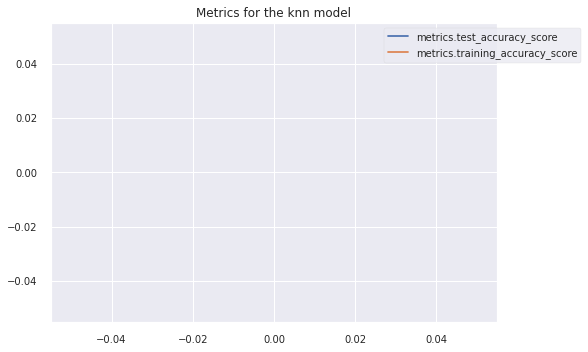

In [18]:
df[df['tags.features'] == model].plot()
plt.title(f"Metrics for the {model} model")
_=plt.legend(bbox_to_anchor=(1.20, 1.))
